## Description
It takes a GWAS on a random phenotype and verifies that the Manhattan and QQ-plots look fine (without inflation).

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import uniform
from pathlib import Path

In [15]:
GWAS_DIR = Path(os.environ["PHENOPLIER_RESULTS_GLS_NULL_SIMS_UKB_50PCS"]) / "harmonized_gwas"
print(GWAS_DIR)

/tmp/phenoplier/results/gls/gwas/null_sims/ukb_50pcs/harmonized_gwas


In [16]:
def load_gwas_data(filename):
    """Load GWAS data, filter P values, and return a DataFrame."""
    filepath = os.path.join(GWAS_DIR, filename)
    gwas = pd.read_csv(filepath, sep="\t")
    gwas = gwas[(gwas["pvalue"] >= 0) & (gwas["pvalue"] <= 1)]
    return gwas

In [17]:
def plot_manhattan(gwas, chr_col, bp_col, p_col, snp_col, title):
    """Generate a Manhattan plot."""
    gwas["-log10P"] = -np.log10(gwas[p_col])
    plt.figure(figsize=(20, 10))
    gwas[chr_col] = gwas[chr_col].astype("category")
    gwas.sort_values(by=[chr_col, bp_col], inplace=True)
    gwas["ind"] = range(len(gwas))
    groups = gwas.groupby(chr_col)

    for i, (name, group) in enumerate(groups):
        plt.scatter(
            group["ind"],
            group["-log10P"],
            s=5,
            label=name,
            color=plt.cm.tab20.colors[i % 20]
        )

    plt.axhline(-np.log10(5e-8), color="red", linestyle="--", label="Genome-wide line")
    plt.xlabel("Chromosome")
    plt.ylabel("-log10(p-value)")
    plt.title(title)
    plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()

In [18]:
def plot_qq(p_values, title):    
    """Generate a QQ plot for GWAS p-values."""
    # Use the uniform distribution as the null distribution!!!
    # Do -log10 transformation to p-values!
    # use func qq plot 2samples
    # x: expected array
    # y: observed array
    
    # Use np.random.unitform to generate expected values with the same size as the observed p_values
    # Or may use linspace instead of random.uniform, don't include 0 and 1. maybe 1 is okay but 0 is not.
    
    # Run TWAS when 
    
    # Calculate expected p-values (under uniform distribution)
    n = len(p_values)
    expected_p_values = np.arange(1, n + 1) / (n + 1)
    
    # Convert to -log10 scale
    observed_log_p = -np.log10(p_values)
    expected_log_p = -np.log10(expected_p_values)
    
    qqplot_2samples(expected_log_p, observed_log_p, xlabel="Expected -log10(p)", ylabel="Observed -log10(p)", line='45')
    plt.title(title)
    plt.show()

Phenotype 0: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.279882 -1.080584    -0.017119   
1                 G   0.087379  0.918140 -0.102777    -0.002085   
2                 G   0.015534  0.310008  1.015205     0.047296   
3                 C   0.057282  0.566449  0.573289     0.014642   
4                 G   0.000000  0.988664  0.014208     0.000378   

   standard_error  sample_size  n_cases  
0        0.015842          312      NaN  
1        0.020287       

/tmp/ipykernel_3646860/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


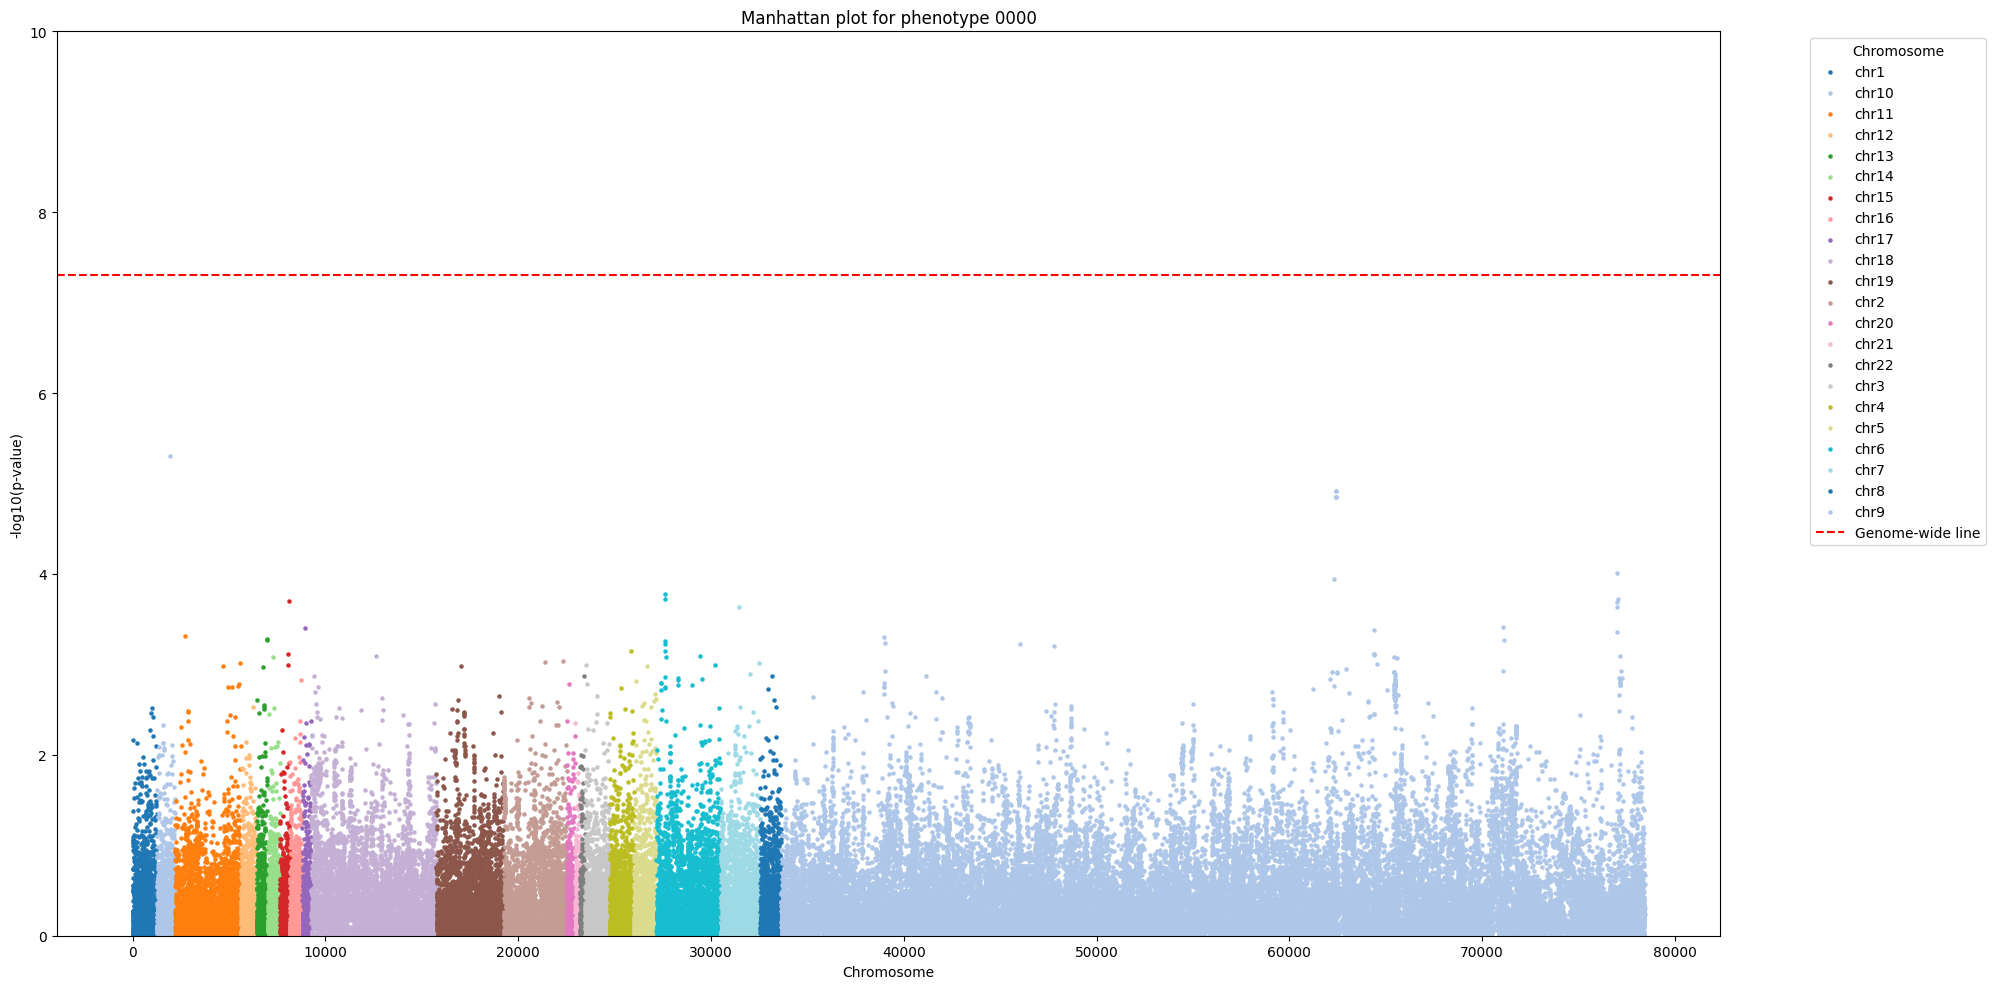

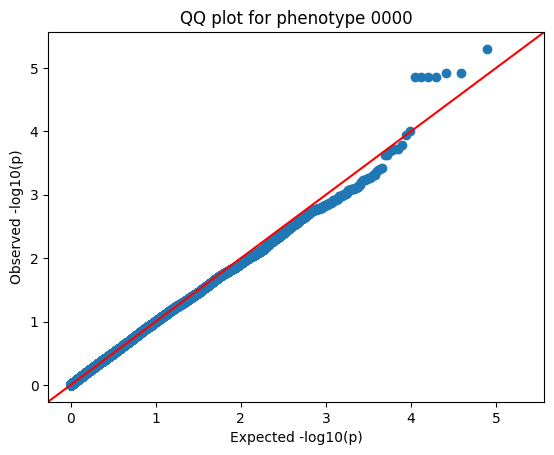

Phenotype 1: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.247490  1.156467     0.018653   
1                 G   0.087379  0.533731  0.622321     0.012854   
2                 G   0.015534  0.568147 -0.570783    -0.027073   
3                 C   0.057282  0.415762  0.813796     0.021160   
4                 G   0.000000  0.842864 -0.198231    -0.005372   

   standard_error  sample_size  n_cases  
0        0.016128          312      NaN  
1        0.020654       

/tmp/ipykernel_3646860/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


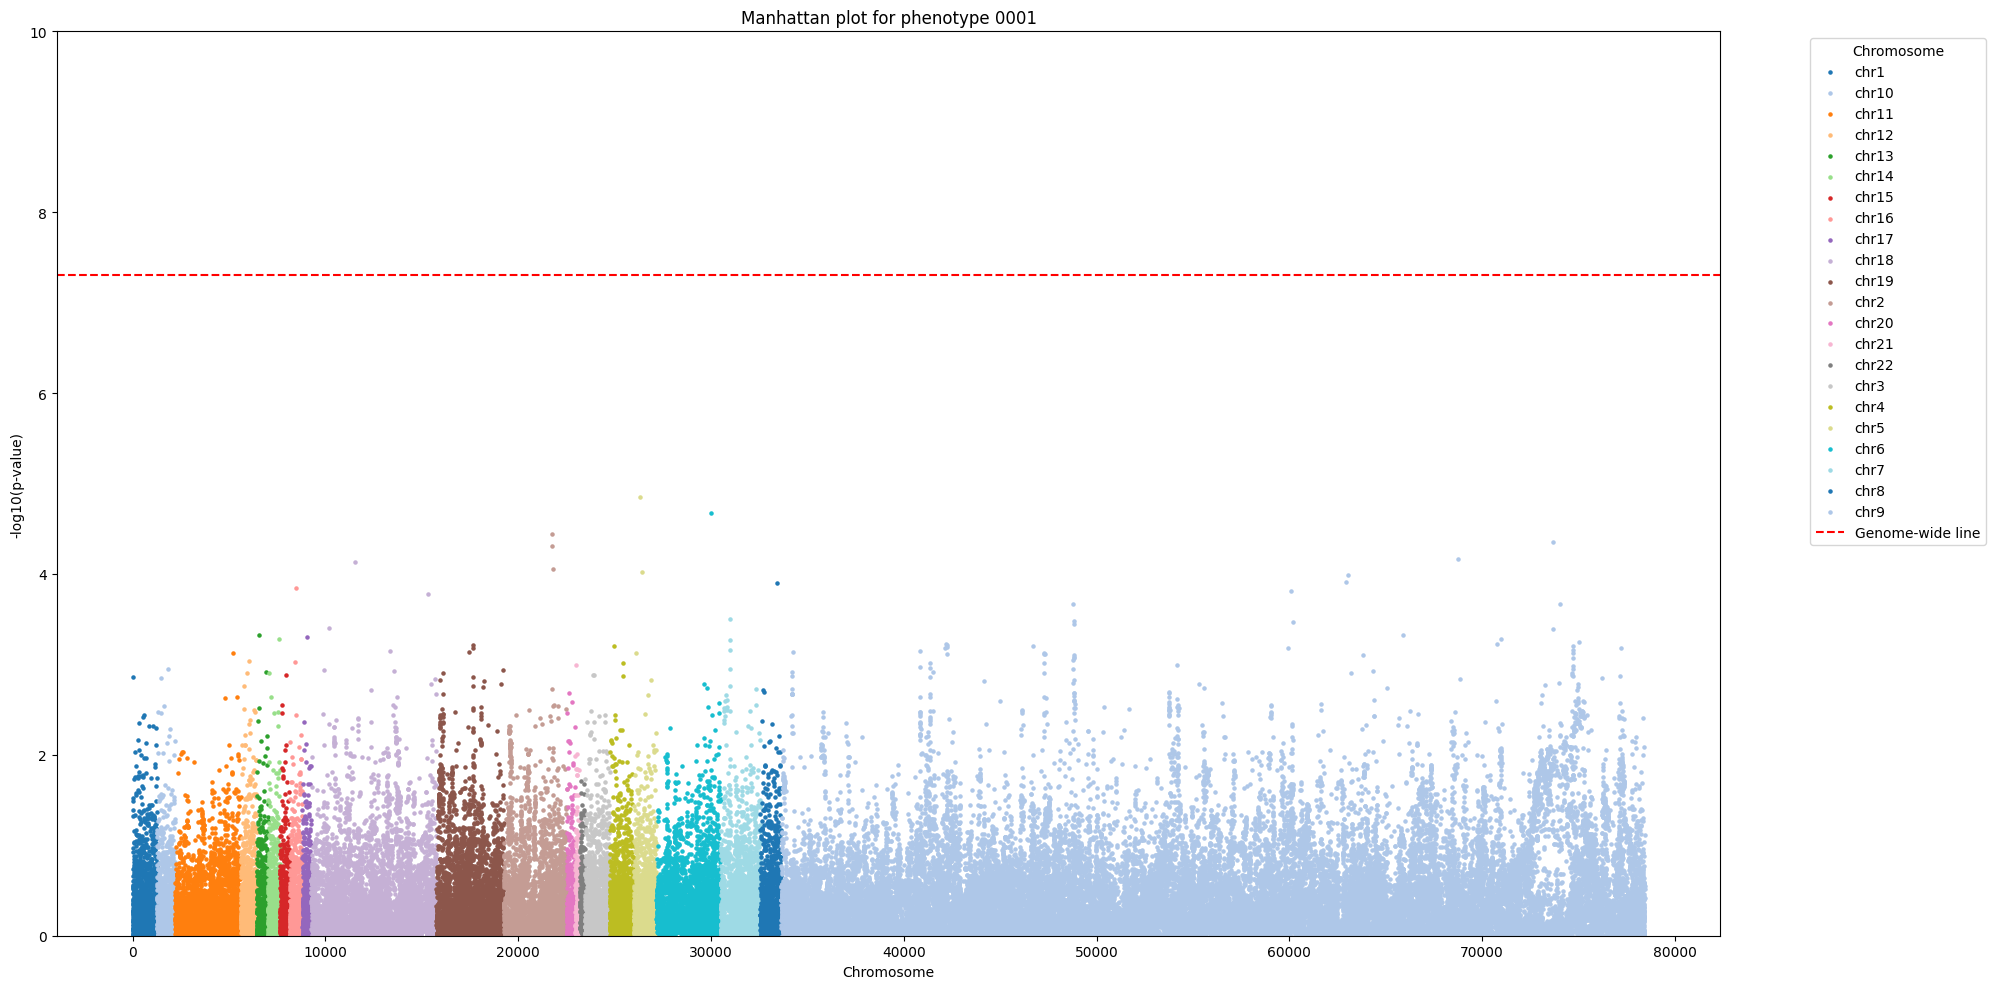

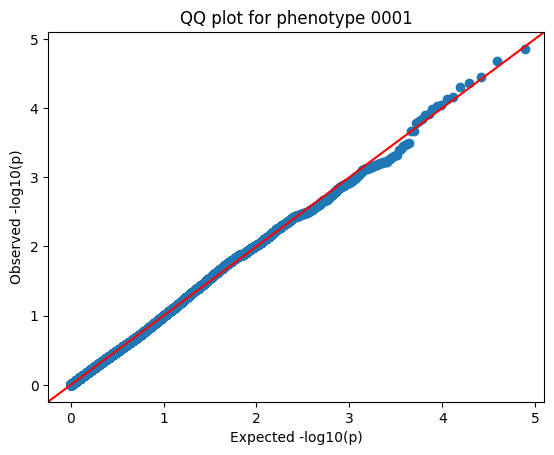

Phenotype 2: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.664947  0.433093     0.006955   
1                 G   0.087379  0.015265 -2.426030    -0.049885   
2                 G   0.015534  0.097675  1.656231     0.078214   
3                 C   0.057282  0.975965  0.030128     0.000780   
4                 G   0.000000  0.531905 -0.625101    -0.016868   

   standard_error  sample_size  n_cases  
0        0.016060          312      NaN  
1        0.020559       

/tmp/ipykernel_3646860/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


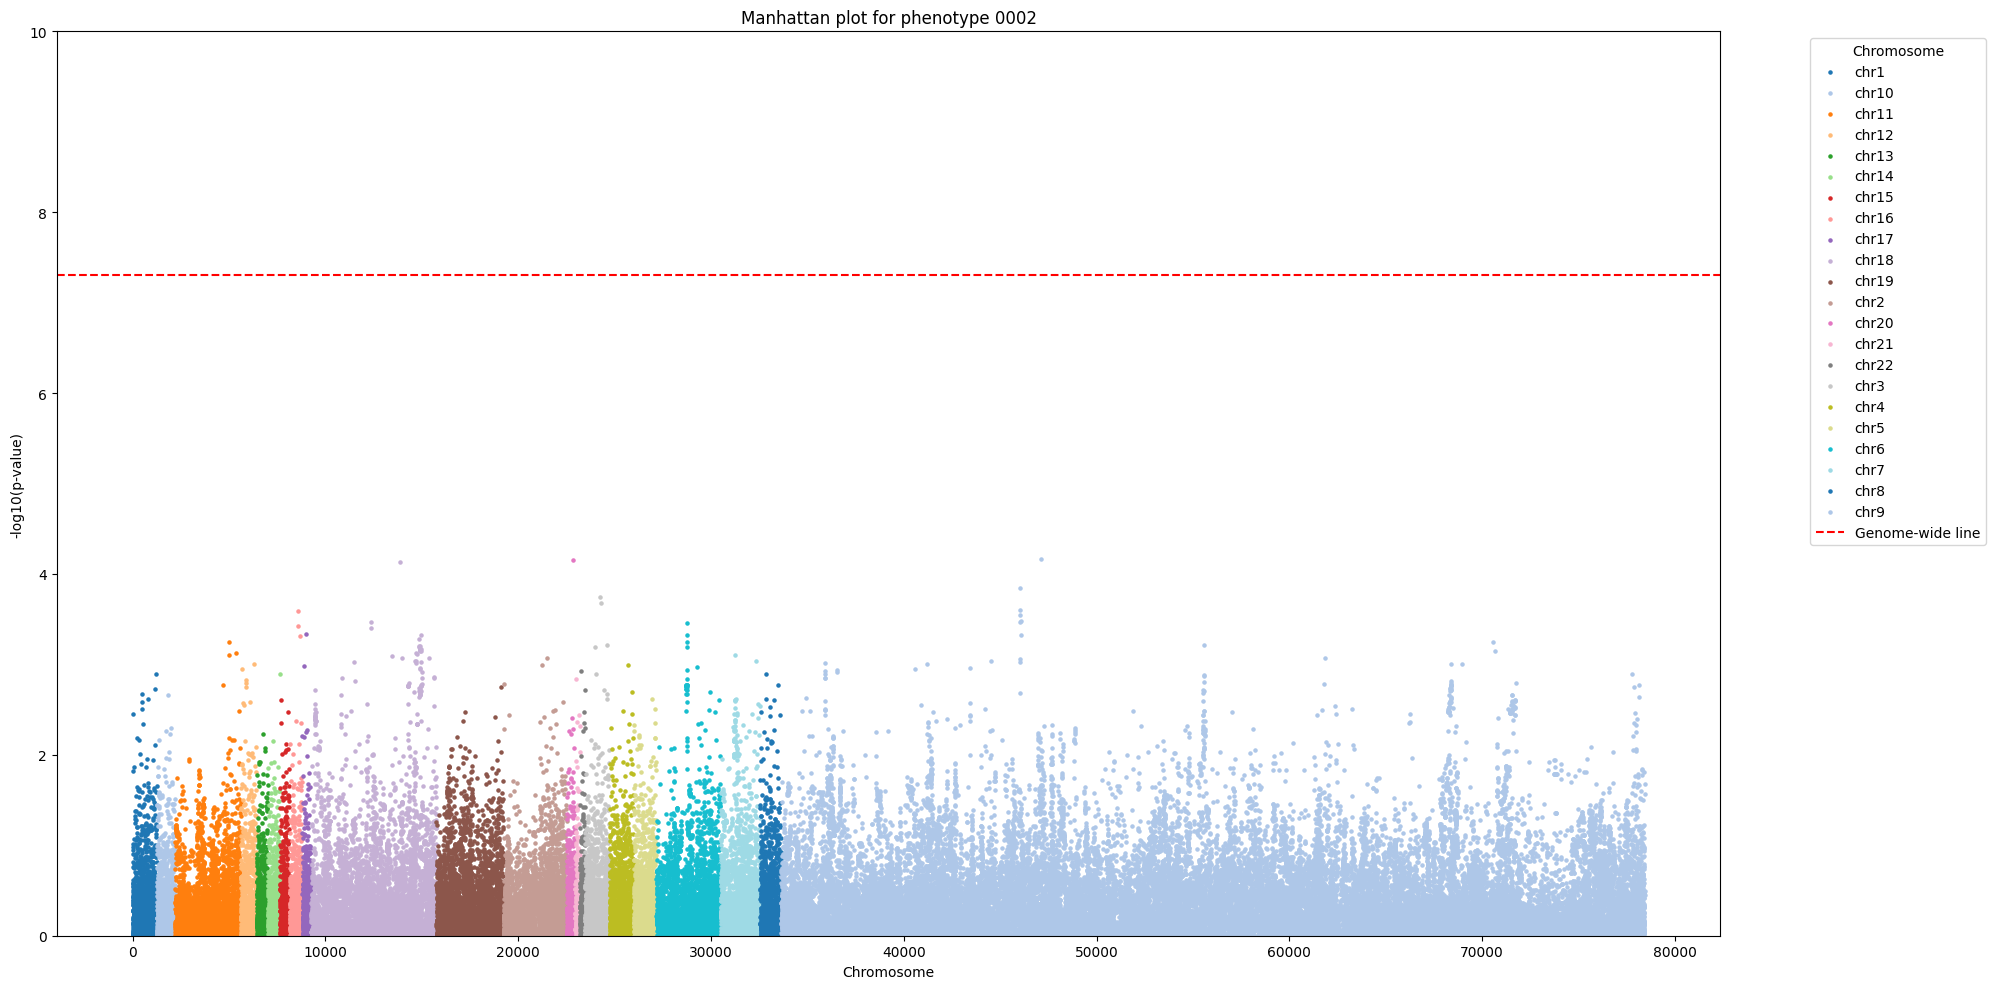

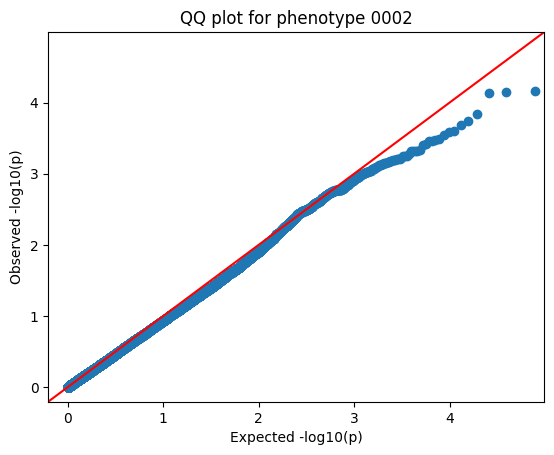

Phenotype 3: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.834150  0.209382     0.003407   
1                 G   0.087379  0.266859 -1.110325    -0.023132   
2                 G   0.015534  0.394548 -0.851398    -0.040734   
3                 C   0.057282  0.964639 -0.044333    -0.001163   
4                 G   0.000000  0.986295  0.017178     0.000470   

   standard_error  sample_size  n_cases  
0        0.016269          312      NaN  
1        0.020832       

/tmp/ipykernel_3646860/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


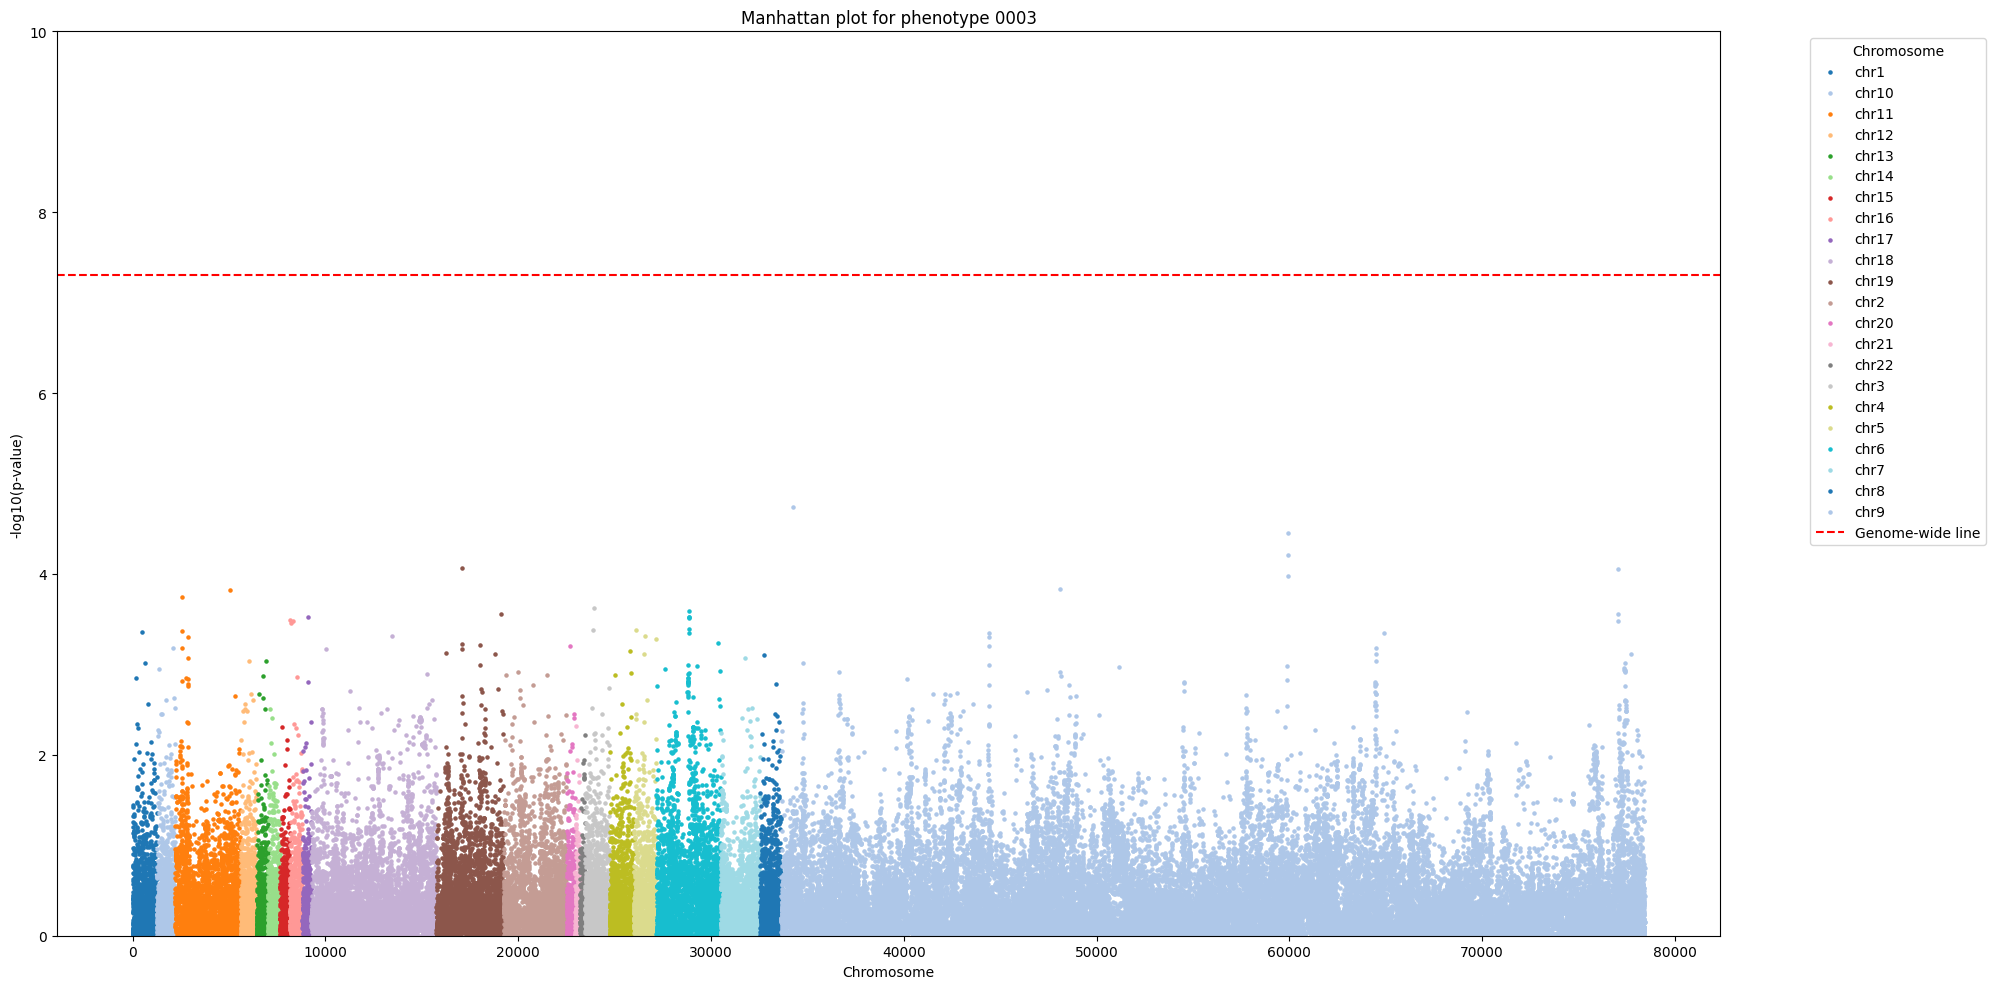

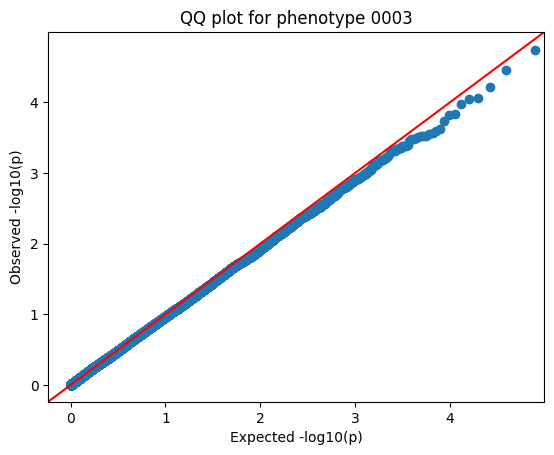

Phenotype 4: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.756731  0.309776     0.004978   
1                 G   0.087379  0.214743 -1.240629    -0.025527   
2                 G   0.015534  0.872558  0.160410     0.007580   
3                 C   0.057282  0.201590  1.277035     0.033080   
4                 G   0.000000  0.556278  0.588379     0.015886   

   standard_error  sample_size  n_cases  
0        0.016068          312      NaN  
1        0.020575       

/tmp/ipykernel_3646860/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


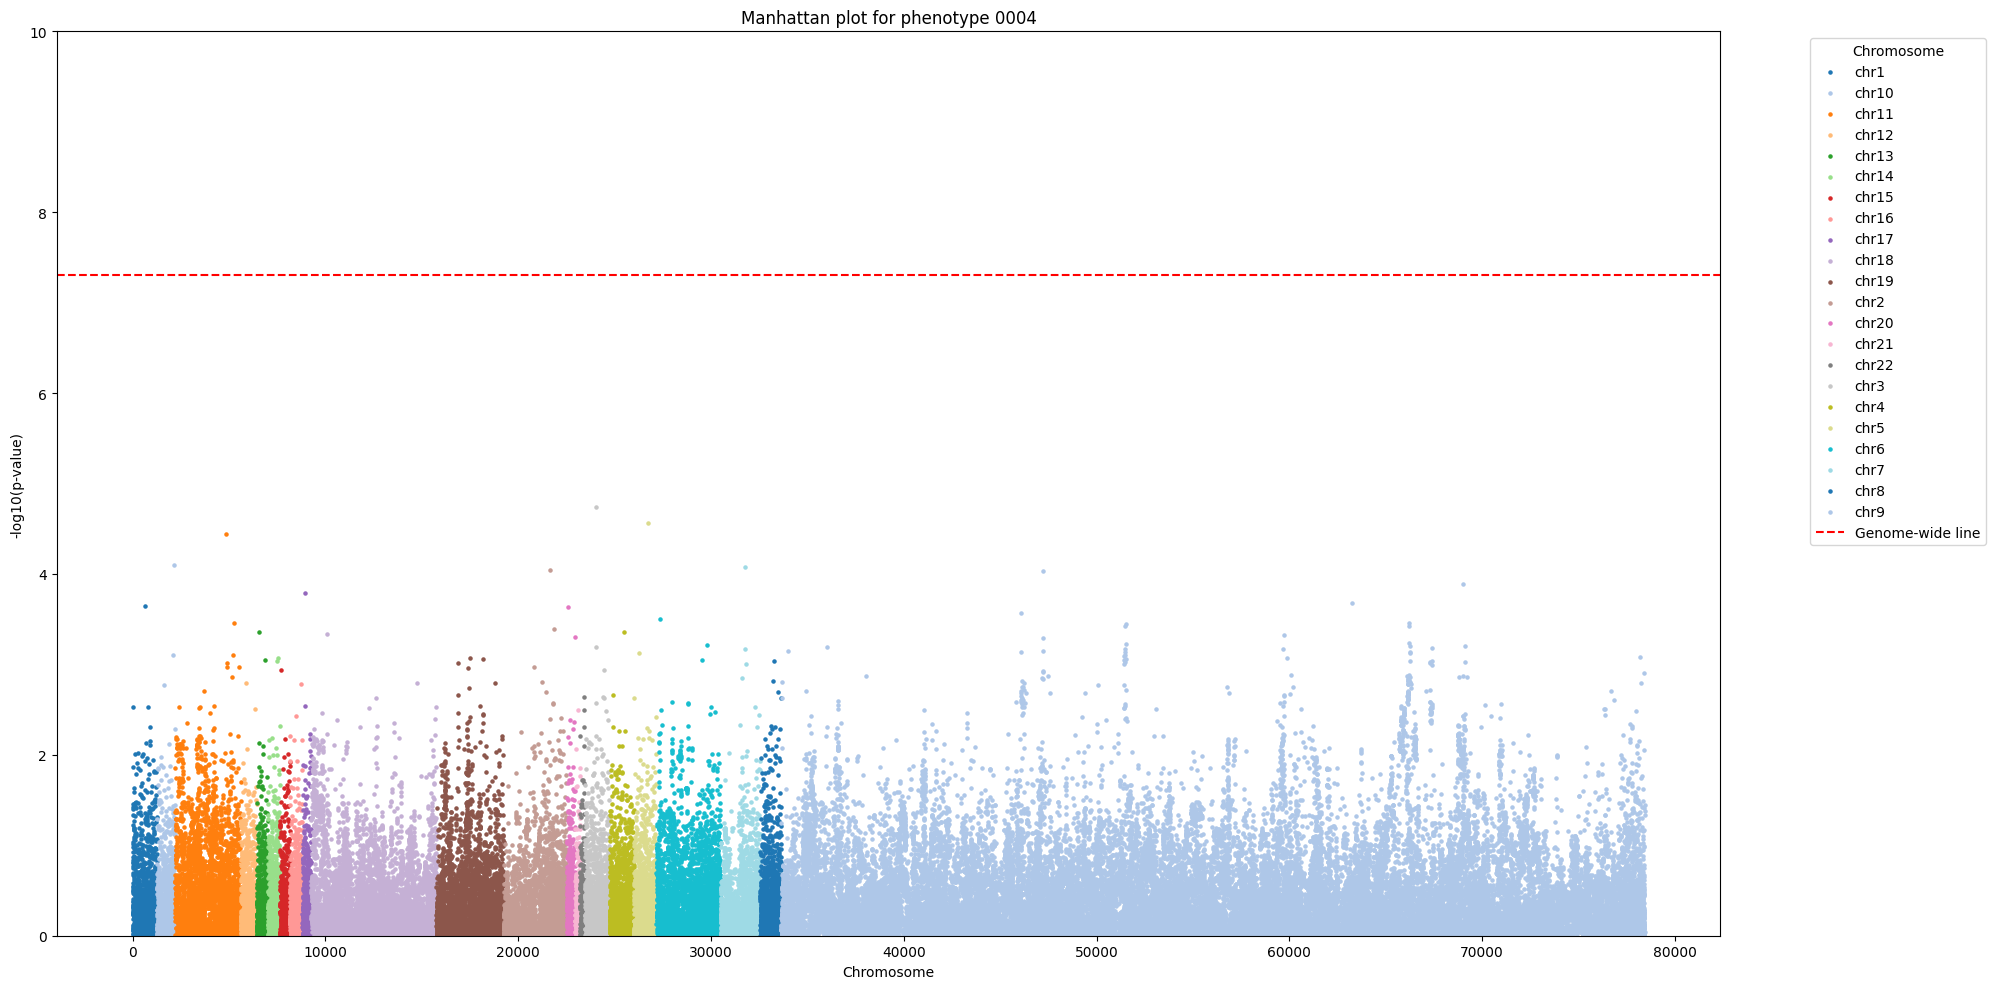

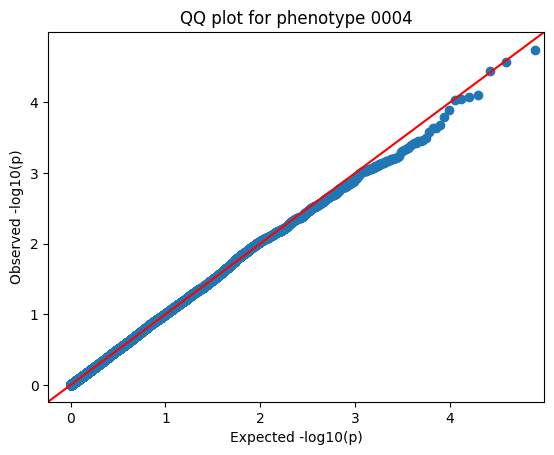

Phenotype 5: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.570736  0.566968     0.009137   
1                 G   0.087379  0.562525  0.579095     0.011951   
2                 G   0.015534  0.978533 -0.026908    -0.001275   
3                 C   0.057282  0.092421  1.682763     0.043718   
4                 G   0.000000  0.955586  0.055693     0.001508   

   standard_error  sample_size  n_cases  
0        0.016116          312      NaN  
1        0.020637       

/tmp/ipykernel_3646860/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


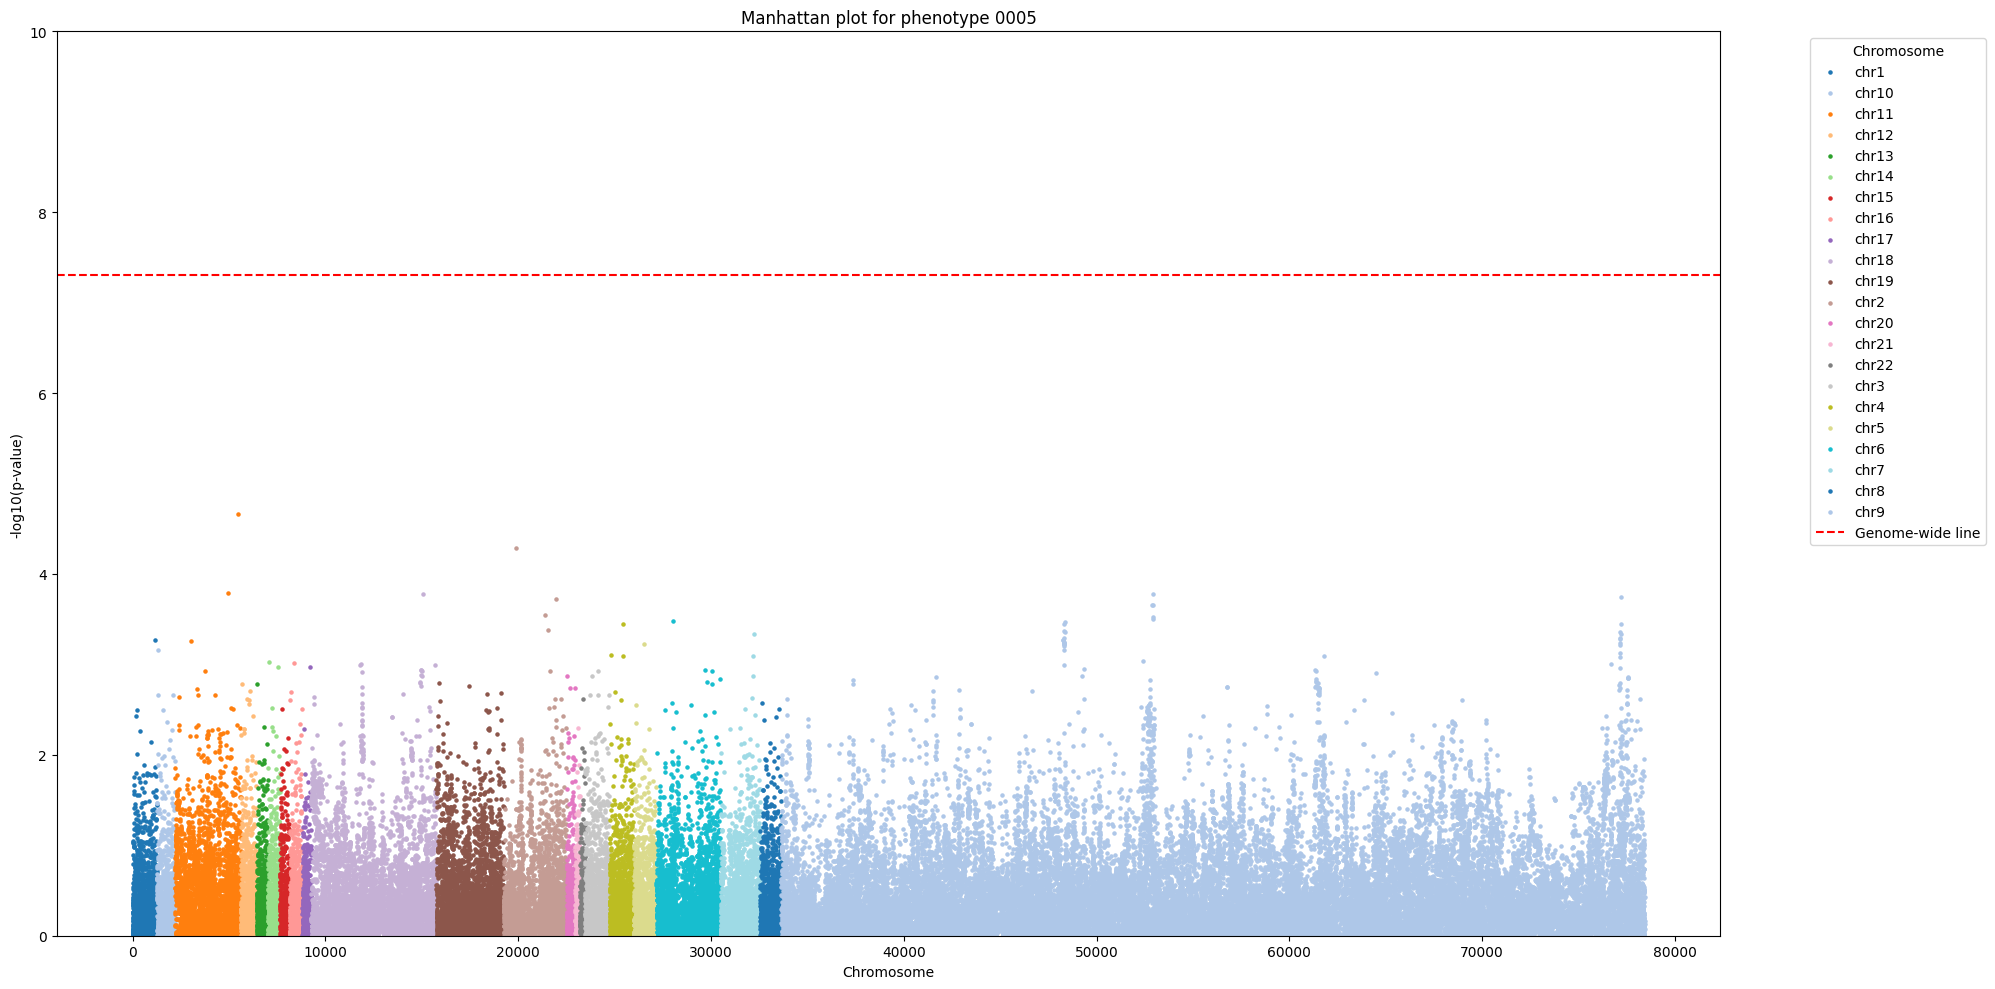

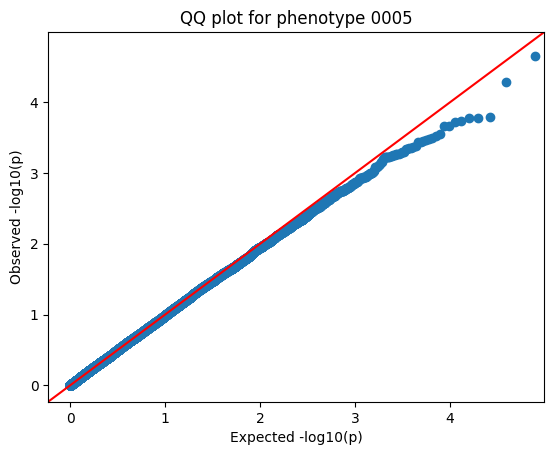

Phenotype 6: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.879943 -0.151041    -0.002469   
1                 G   0.087379  0.445006  0.763767     0.015985   
2                 G   0.015534  0.418718  0.808647     0.038865   
3                 C   0.057282  0.181763 -1.335346    -0.035182   
4                 G   0.000000  0.987656 -0.015472    -0.000425   

   standard_error  sample_size  n_cases  
0        0.016344          312      NaN  
1        0.020928       

/tmp/ipykernel_3646860/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


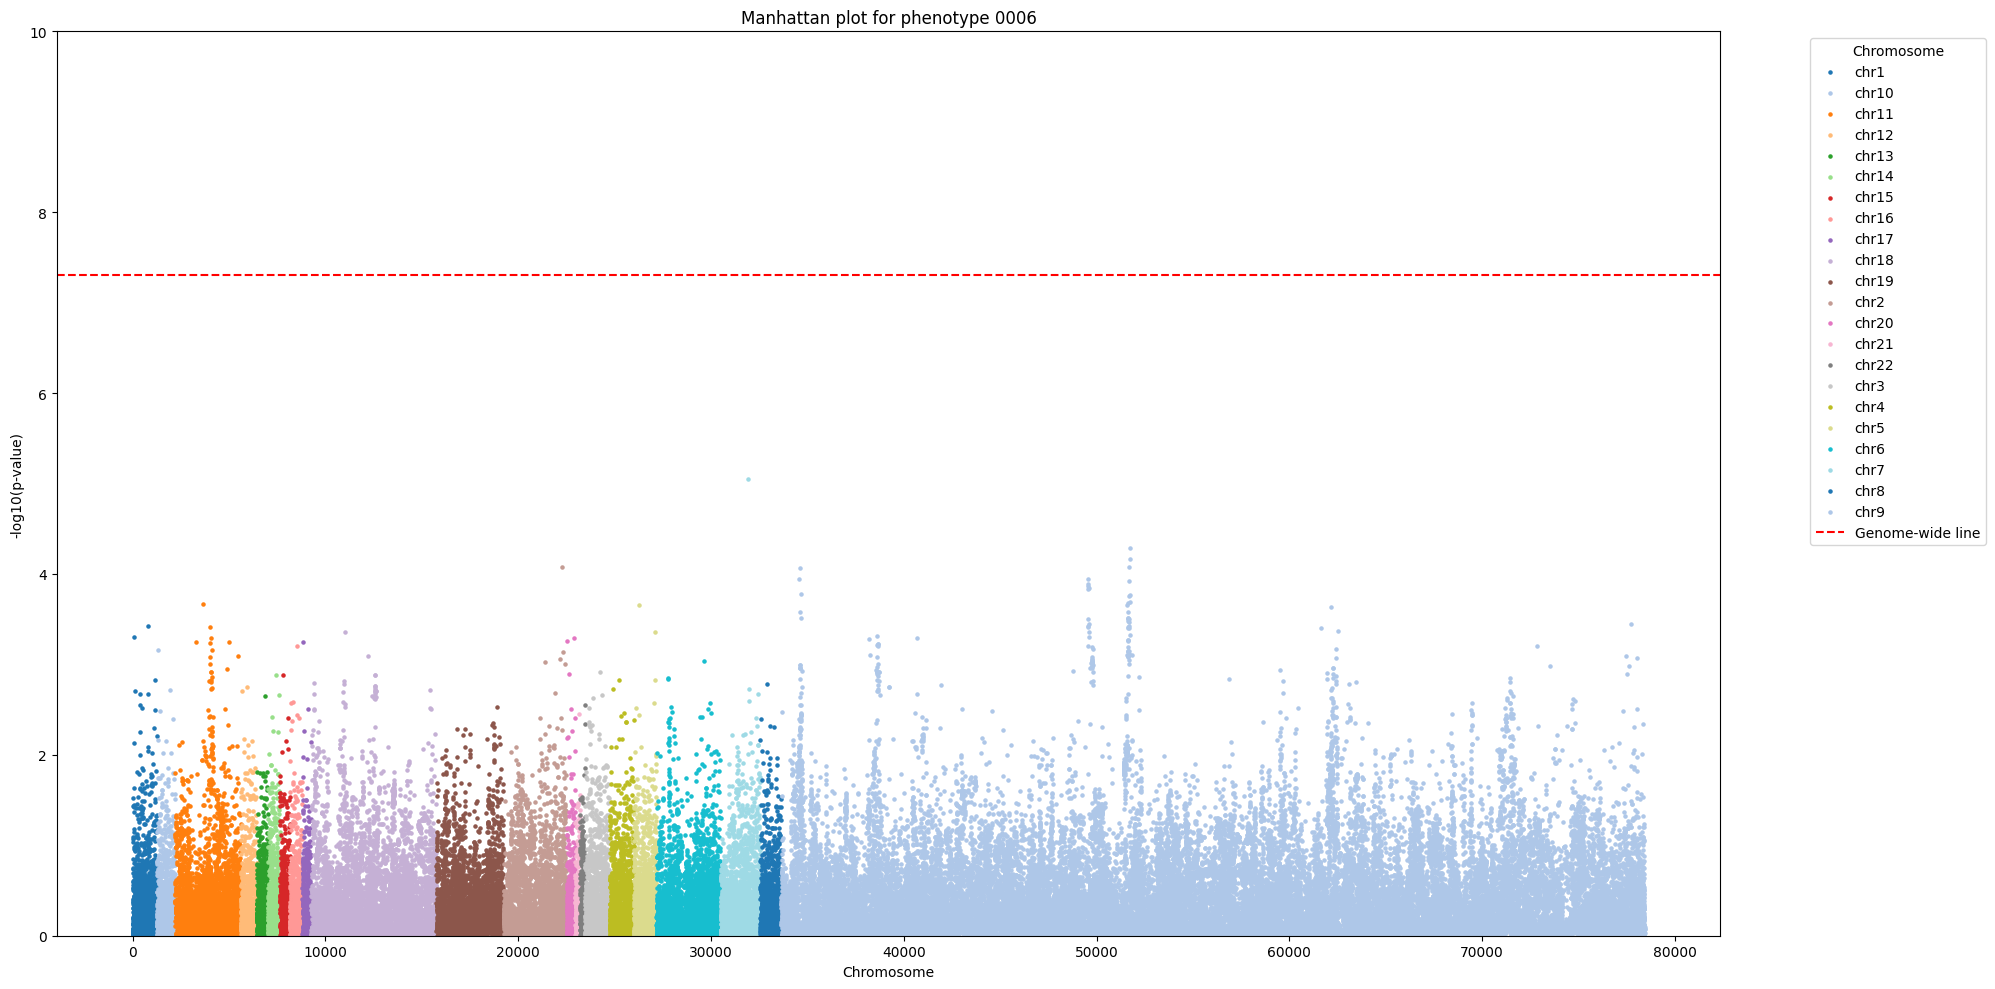

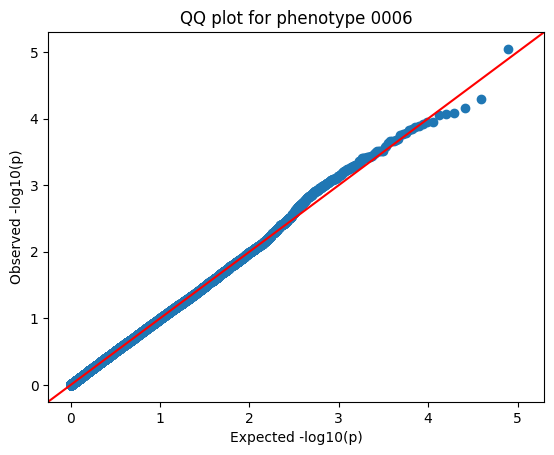

Phenotype 7: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.729972  0.345163     0.005518   
1                 G   0.087379  0.066014  1.838329     0.037628   
2                 G   0.015534  0.199917 -1.281788    -0.060252   
3                 C   0.057282  0.007119  2.691226     0.069342   
4                 G   0.000000  0.127411  1.524391     0.040943   

   standard_error  sample_size  n_cases  
0        0.015985          312      NaN  
1        0.020466       

/tmp/ipykernel_3646860/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


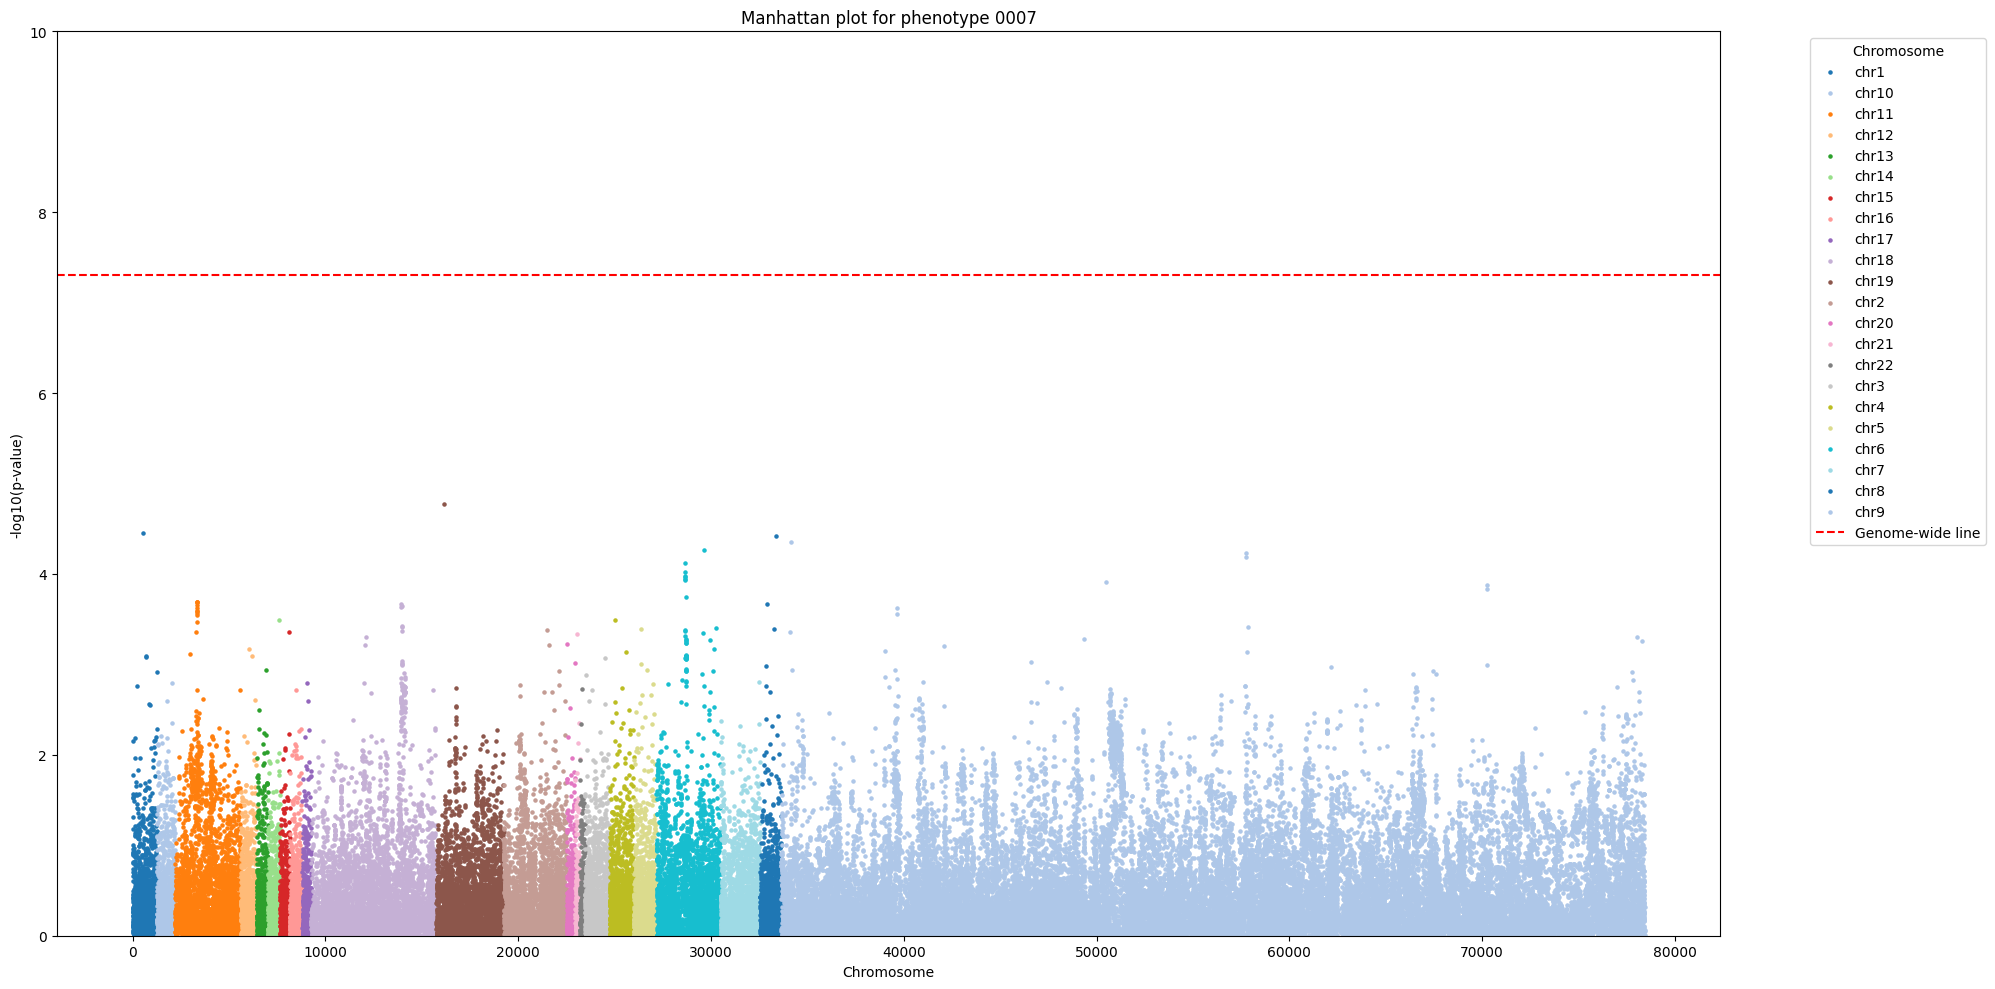

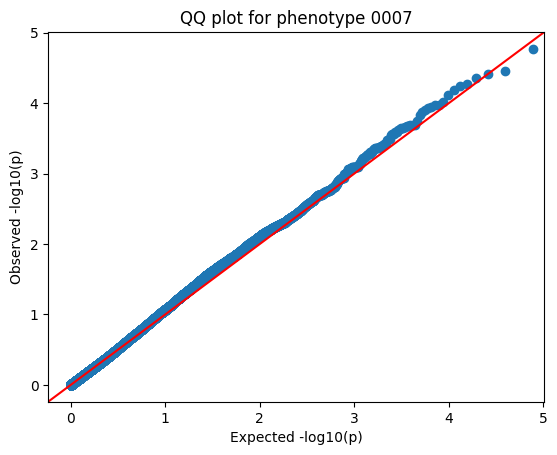

Phenotype 8: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.702623  0.381782     0.006148   
1                 G   0.087379  0.179345  1.342774     0.027690   
2                 G   0.015534  0.526506  0.633349     0.029994   
3                 C   0.057282  0.539470  0.613615     0.015931   
4                 G   0.000000  0.925828  0.093095     0.002519   

   standard_error  sample_size  n_cases  
0        0.016104          312      NaN  
1        0.020620       

/tmp/ipykernel_3646860/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


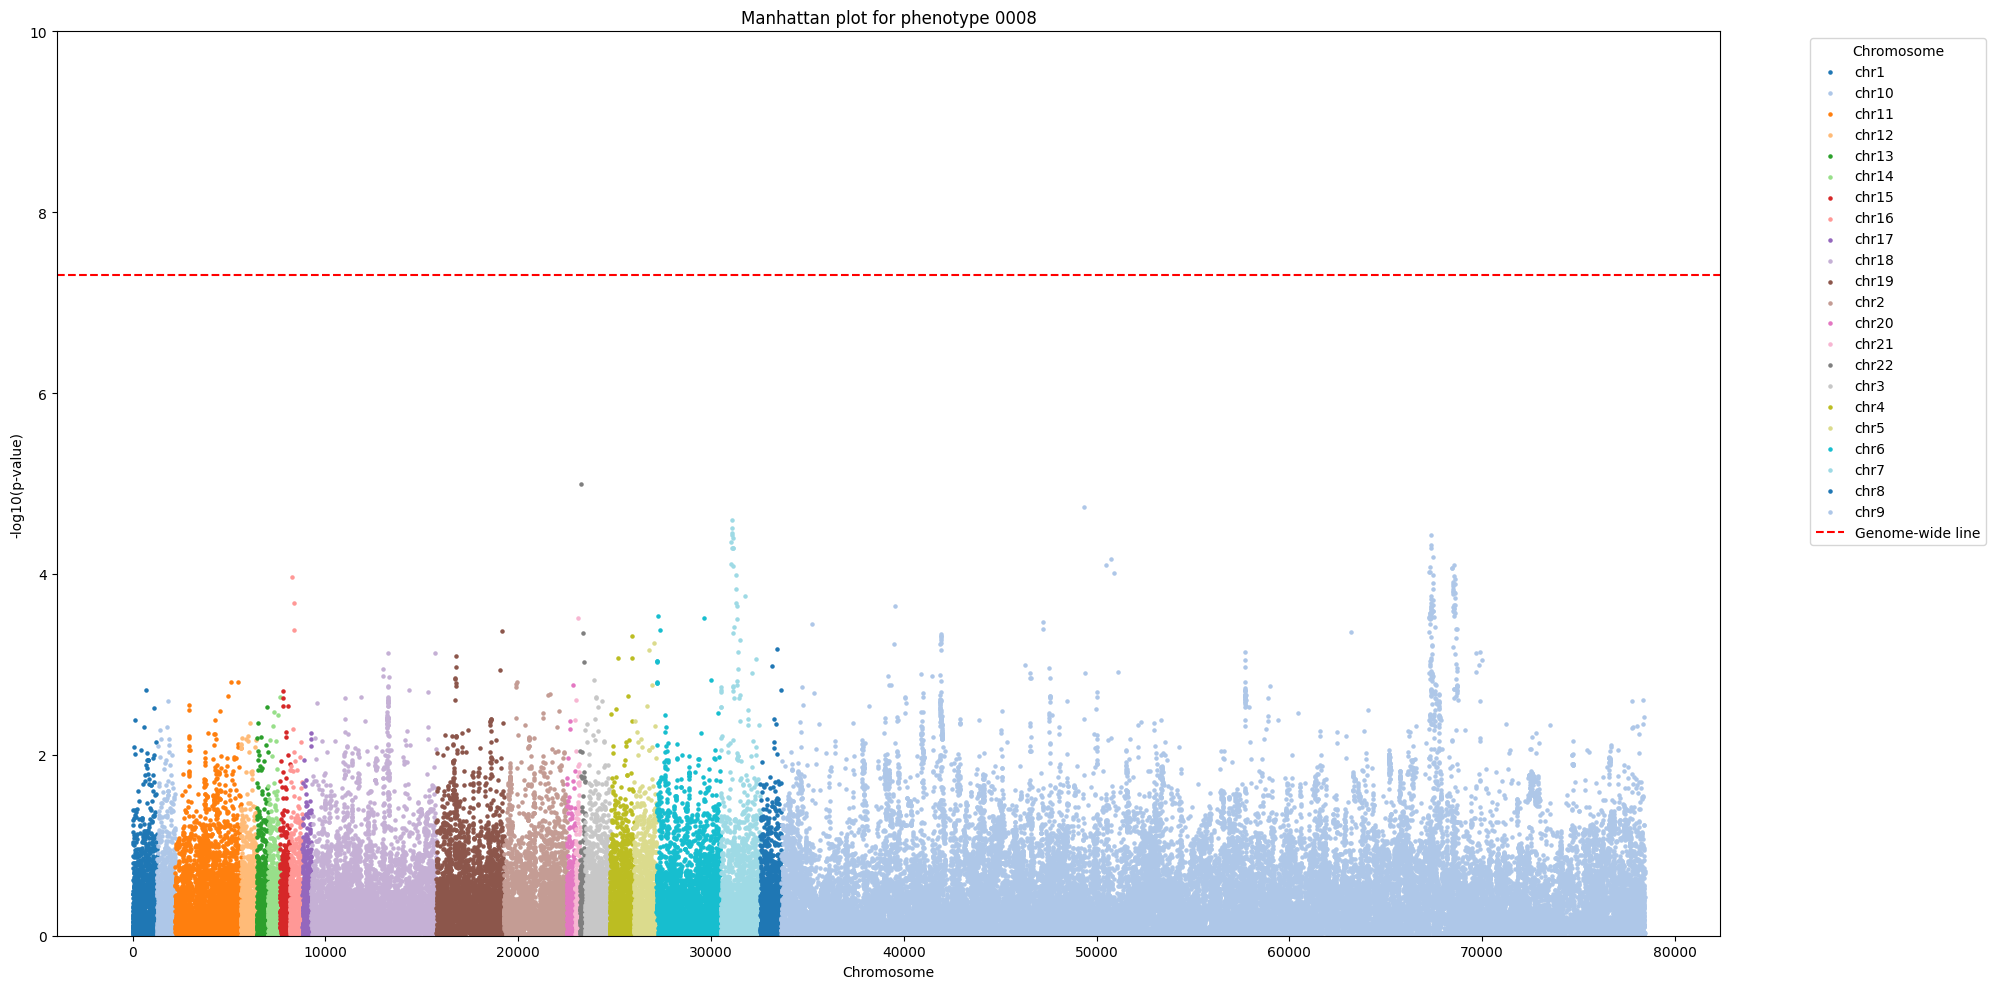

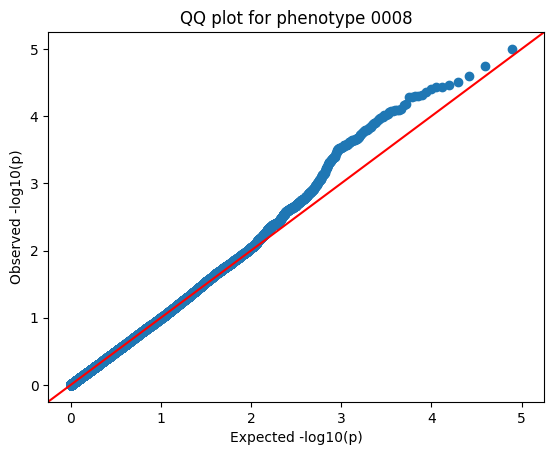

Phenotype 9: Dimensions = (78428, 13)
    variant_id      panel_variant_id chromosome  position effect_allele  \
0   rs11516185   chr1_972645_G_A_b38       chr1    972645             A   
1    rs7518814  chr1_1177741_G_A_b38       chr1   1177741             A   
2   rs55945496  chr1_1192732_G_A_b38       chr1   1192732             A   
3  rs114330234  chr1_1287310_C_T_b38       chr1   1287310             T   
4   rs11260575  chr1_1339592_G_A_b38       chr1   1339592             A   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 G   0.000000  0.776779  0.283519     0.004537   
1                 G   0.087379  0.773893  0.287286     0.005887   
2                 G   0.015534  0.432595  0.784759     0.036929   
3                 C   0.057282  0.385778 -0.867299    -0.022374   
4                 G   0.000000  0.979528 -0.025661    -0.000690   

   standard_error  sample_size  n_cases  
0        0.016002          312      NaN  
1        0.020492       

/tmp/ipykernel_3646860/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


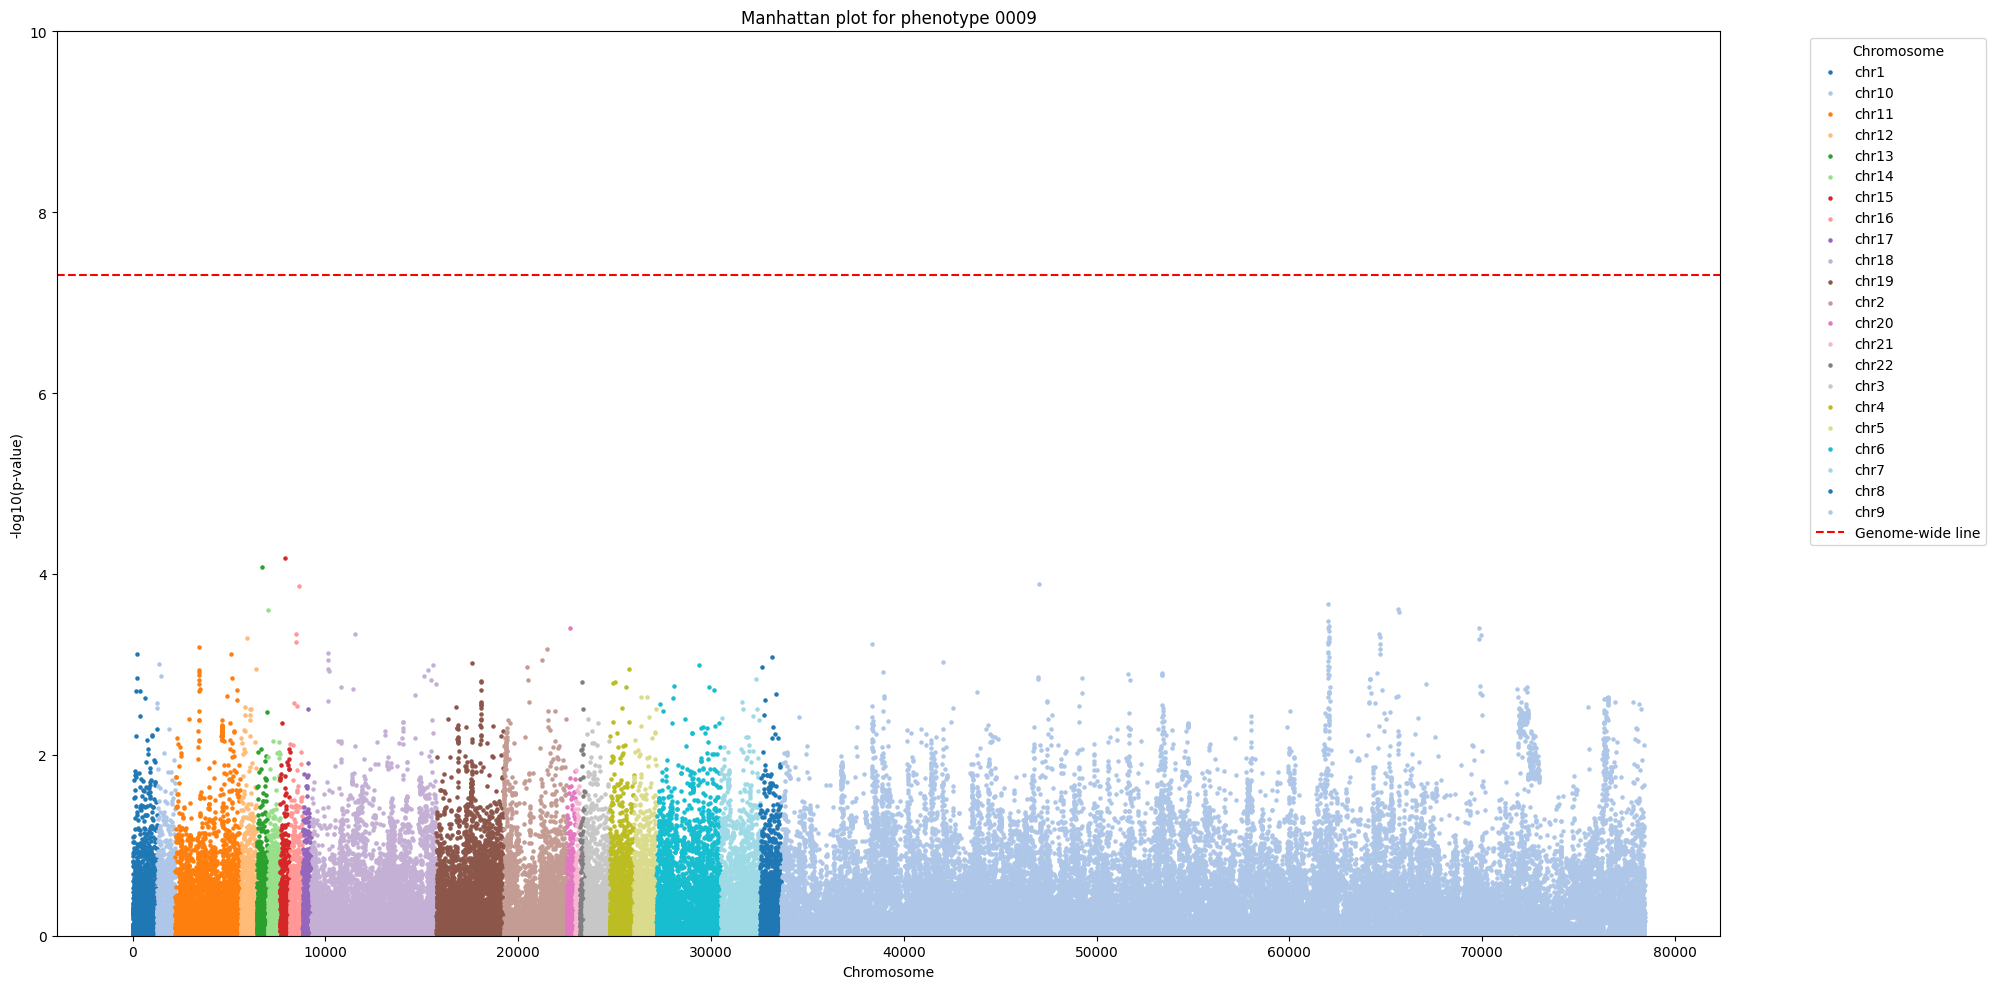

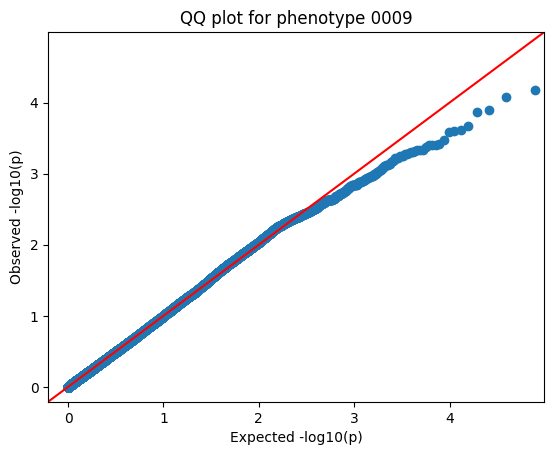

In [19]:
num_rand_phenotypes = 10

for phenotype in range(num_rand_phenotypes):
    filename = f"random.pheno{phenotype:04d}.glm.linear.tsv-harmonized.txt"
    
    # Load data
    gwas = load_gwas_data(filename)
    print(f"Phenotype {phenotype}: Dimensions = {gwas.shape}")
    print(gwas.head())
    
    # Manhattan plot
    plot_manhattan(
        gwas,
        chr_col="chromosome",
        bp_col="position",
        p_col="pvalue",
        snp_col="variant_id",
        title=f"Manhattan plot for phenotype {phenotype:04d}"
    )
    
    # QQ plot
    plot_qq(gwas["pvalue"], title=f"QQ plot for phenotype {phenotype:04d}")
